<a href="https://colab.research.google.com/github/Hamid-Mofidi/Neural_ODE/blob/main/Neural_ODEs_app_to_ODEs/NODEs_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Neural ODEs for solving a system of ODEs:

 the following code demonstrates the application of neural ordinary differential equations (ODEs) to solving systems of ODEs.

In traditional numerical methods, such as the Runge-Kutta method used in this code, the system of differential equations is solved by discretizing the time domain and approximating the derivatives at each time step. However, in this code, a neural network is used to approximate the solution to the system of ODEs. The neural network takes in the current time and state as input and outputs the derivative of the state.

The neural network is trained to approximate the solution by minimizing the mean squared error (MSE) loss between the predicted solution and the observed data obtained from numerical integration. The training loop updates the neural network parameters using backpropagation and the Adam optimizer.

By using neural ODEs, this code offers a flexible and continuous-time approach to solving systems of ODEs. The neural network can capture complex dynamics and provide a continuous approximation to the solution without the need for explicit discretization. This approach has potential applications in various scientific and engineering domains where systems of differential equations need to be solved.


In this example, we define the initial condition `y0` and the time points `t` at which we want to evaluate the solution.

We then create an instance of the `ODEFunc` class called `odefunc`, which represents the neural network that will learn the dynamics of the system.

Next, we define the loss function, which in this case is the mean squared error (MSE) loss. This loss function measures the difference between the predicted solution and the observed data.

We also define the optimizer, which is Adam in this example, to update the neural network parameters during the training process.

The training loop consists of multiple epochs. In each epoch, we reset the gradients of the optimizer, solve the system using the current state of the neural network, compute the loss between the predicted solution and the observed data, perform backpropagation to compute the gradients of the neural network parameters, update the parameters using the optimizer, and print the loss for monitoring.

Finally, we print the final solution, which represents the approximation of the system of differential equations obtained after training the neural network using the backpropagation process.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Define the system of differential equations
def system(t, y):
    y = torch.tensor(y)
    dydt = torch.tensor([y[1], -np.sin(y[0].item())])
    return dydt

# Define the neural network architecture
class ODEFunc(nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.fc1 = nn.Linear(2, 50)
        self.fc2 = nn.Linear(50, 2)

    def forward(self, t, y):
        out = torch.relu(self.fc1(y))
        out = self.fc2(out)
        return out.view(-1, 2)

# Define the initial condition
y0 = torch.tensor([0.0, 1.0])

# Define the time points
t = torch.linspace(0, 10, 100)

# Create an instance of the ODEFunc class
odefunc = ODEFunc()

# Solve the system of differential equations using the Runge-Kutta method
solution = solve_ivp(lambda t, y: system(t, y).numpy(), [t[0], t[-1]], y0.numpy(), t_eval=t.numpy()).y.T

# Convert the solution to a tensor
solution = torch.tensor(solution)

# Define the observed data as the solution
observed_data = solution

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(odefunc.parameters(), lr=0.01)

# Training loop
solution2 = []
for epoch in range(100):
    # Reset gradients
    optimizer.zero_grad()

    # Forward pass
    out = odefunc(t, y0)

    # Solve the system using the current state of the neural network
    solution = torch.stack([y0.unsqueeze(0), out], dim=0)
    solution = solution.double()

    # Compute the loss between the predicted solution and the observed data
    loss = loss_fn(solution, observed_data)

    # Backpropagation
    loss.backward()

    # Update the neural network parameters
    optimizer.step()

    # Print the loss for monitoring
    print(f"Epoch {epoch+1}: Loss = {loss.item()}")

    # Append the current solution to the solution2 list
    solution2.append(solution)

# Convert the solution2 list to a tensor
solution2 = torch.cat(solution2)



Epoch 1: Loss = 0.7519377803077382
Epoch 2: Loss = 0.7545424900448728
Epoch 3: Loss = 0.7517788599476956
Epoch 4: Loss = 0.751885811868059
Epoch 5: Loss = 0.7522715807750937
Epoch 6: Loss = 0.7517534075944491
Epoch 7: Loss = 0.7510464438424067
Epoch 8: Loss = 0.7509642913452512
Epoch 9: Loss = 0.7512626338358865
Epoch 10: Loss = 0.7513270765854587
Epoch 11: Loss = 0.7510246508503365
Epoch 12: Loss = 0.7506640877987653
Epoch 13: Loss = 0.7505997012889931
Epoch 14: Loss = 0.7507836718903812
Epoch 15: Loss = 0.750897604630832
Epoch 16: Loss = 0.7507659887237085
Epoch 17: Loss = 0.7505208875104986
Epoch 18: Loss = 0.750414892678485
Epoch 19: Loss = 0.7505103965951722
Epoch 20: Loss = 0.7506347319117256
Epoch 21: Loss = 0.7506111163920264
Epoch 22: Loss = 0.7504564083549039
Epoch 23: Loss = 0.750339315872326
Epoch 24: Loss = 0.750367861674244
Epoch 25: Loss = 0.7504685215639492
Epoch 26: Loss = 0.7504935984534518
Epoch 27: Loss = 0.750405450540708
Epoch 28: Loss = 0.7503085290457733
Epoch 2

In [ ]:
print(solution2.shape)
print(t.shape)
#print(solution2)

torch.Size([200, 1, 2])
torch.Size([100])


In [ ]:
# Create a tensor of odd indices from 1 to 199
odd_indices = torch.arange(1, 200, 2)
#print(odd_indices)

# Pick odd number of matrices using torch.index_select
odd_matrices = torch.index_select(solution2, dim=0, index=odd_indices)
print(odd_matrices.shape)

torch.Size([100, 1, 2])


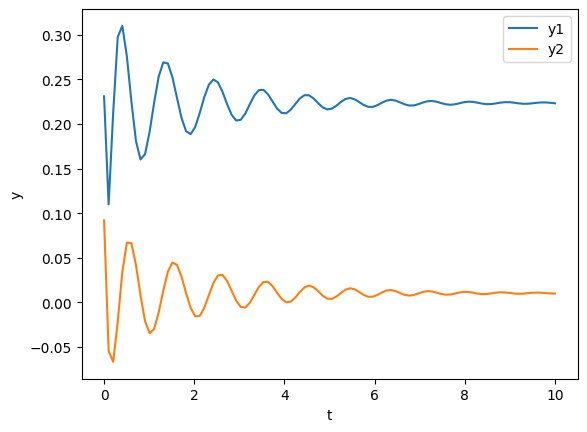

In [ ]:
# Plot the solutions
plt.plot(t[:odd_matrices.shape[0]], odd_matrices[:, 0, 0].detach().numpy(), label='y1')
plt.plot(t[:odd_matrices.shape[0]], odd_matrices[:, 0, 1].detach().numpy(), label='y2')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

## Generally:

This code trains a neural network to solve a system of ordinary differential equations (ODEs) using the method of automatic differentiation. Here's a general overview of what the code does:

1. Define the system of differential equations: The code defines a system of differential equations, which in this case is a simple pendulum system.

2. Define the neural network architecture: The code defines a neural network architecture, which is used to approximate the solution to the system of differential equations. The neural network takes in the current time and state as input and outputs the derivative of the state.

3. Define the initial condition and time points: The code defines the initial condition of the system and the time points at which the solution will be evaluated.

4. Solve the system of differential equations using the Runge-Kutta method: The code uses the scipy `solve_ivp` function to solve the system of differential equations using the Runge-Kutta method. This provides the "true" solution to the system, which will be used as the observed data for training the neural network.

5. Convert the solution to a tensor: The code converts the solution obtained from `solve_ivp` to a PyTorch tensor.

6. Define the observed data as the solution: The code defines the observed data for training the neural network as the solution obtained from `solve_ivp`.

7. Define the loss function and optimizer: The code defines the mean squared error (MSE) loss function and the Adam optimizer.

8. Training loop: The code performs a training loop for a specified number of epochs. In each epoch, it does the following:
   - Resets the gradients of the optimizer.
   - Performs a forward pass through the neural network to obtain the output.
   - Solves the system of differential equations using the current state of the neural network.
   - Computes the loss between the predicted solution and the observed data.
   - Performs backpropagation to compute the gradients of the loss with respect to the neural network parameters.
   - Updates the neural network parameters based on the computed gradients.
   - Prints the current epoch and the corresponding loss for monitoring purposes.
   - Appends the current solution to a list.

9. Convert the list of solutions to a tensor: The code converts the list of solutions obtained during training to a PyTorch tensor.

10. Plot the solutions: The code plots the solutions obtained during training using matplotlib.


## Specifically:  

Let's go through the code step by step and explain what it does:

1. `solution = torch.tensor(solution)`: This line converts the `solution` array into a PyTorch tensor.

2. `observed_data = solution`: Here, the `observed_data` variable is defined as the same tensor `solution`.

3. `loss_fn = nn.MSELoss()`: This line defines the Mean Squared Error (MSE) loss function.

4. `optimizer = optim.Adam(odefunc.parameters(), lr=0.01)`: The Adam optimizer is defined with a learning rate of 0.01. It will be used to update the parameters of the `odefunc` neural network.

5. `solution2=[]`: An empty list `solution2` is created to store the solutions at each epoch.

6. `for epoch in range(100):`: This loop runs for 100 epochs.

7. `optimizer.zero_grad()`: Resets the gradients of the optimizer.

8. `out = odefunc(t, y0)`: Performs a forward pass through the neural network `odefunc` to obtain the output.

9. `solution = torch.stack([y0.unsqueeze(0), out], dim=0)`: Stacks the initial condition `y0` and the output `out` along the first dimension, creating a tensor of shape `(2, batch_size, 2)`. The `unsqueeze(0)` is used to add an additional dimension to `y0` to match the shape of `out`.

10. `solution = solution.double()`: Converts the tensor `solution` to double precision.

11. `solution2.append(solution)`: Appends the current solution to the `solution2` list.

12. `loss = loss_fn(solution, observed_data)`: Calculates the loss by comparing the predicted solution `solution` with the observed data `observed_data` using the MSE loss function.

13. `loss.backward()`: Performs backpropagation to compute the gradients of the loss with respect to the neural network parameters.

14. `optimizer.step()`: Updates the neural network parameters based on the computed gradients.

15. `print(f"Epoch {epoch+1}: Loss = {loss.item()}")`: Prints the current epoch and the corresponding loss for monitoring purposes.

16. `print(solution)`: Prints the current solution.

